In [4]:
import matplotlib.pyplot as plt
import requests

api_key = "118322912aa8543272e4c9f2401f3a084cf4b1c7f0ff0b2809955ed44a96050a"

In [5]:
# List All Text Sets
url = "https://intelligentarchive.sydney.edu.au/api/v1/text-sets"

response = requests.get(url, headers={"X-API-KEY": api_key})

if response.status_code == 200:
    # Parse JSON response into Python object
    text_sets = response.json()
    
    # Loop through each text set to print its ID and name
    print("List of Text Sets:")
    for text_set in text_sets:
        set_id = text_set.get('id', 'N/A')  # 'N/A' will be used if 'id' is not available
        set_name = text_set.get('name', 'N/A')  # 'N/A' will be used if 'name' is not available
        print(f"  - Name: {set_name}   ID: {set_id}")

else:
    print(f"Failed to get data: {response.status_code} {response.reason}")

List of Text Sets:
  - Name: Shakespeare   ID: 86


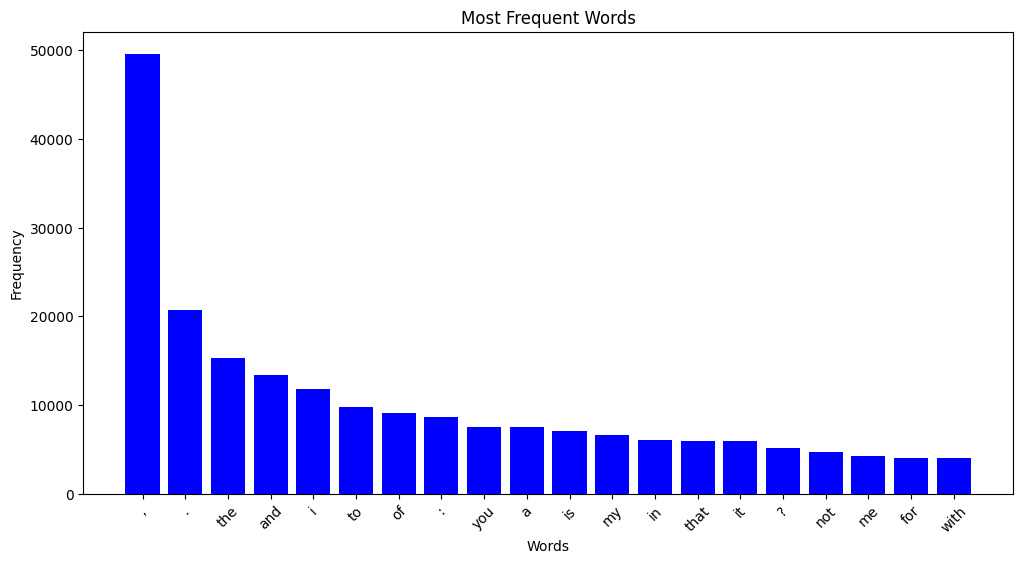

In [10]:
# Word frequency..  Top 20 most frequent word.

textset_id = 86  # Replace with your actual text set ID

# URL and Data for Word Frequencies
url = "https://intelligentarchive.sydney.edu.au/api/v1/word-frequencies"
word_freq_request = {
    "textSet": textset_id,
}

# Make the API Request
response = requests.post(url, json=word_freq_request, headers={"X-API-KEY": api_key})

# Create a dictionary to hold word frequencies
word_frequency_map = {}

# Handle the Response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])

        for freq in freqs:
            word = freq.get('word')
            value = freq.get('value')

            word_frequency_map[word] = word_frequency_map.get(word, 0) + value

    # Sort by frequency and take the top 20 words
    sorted_items = sorted(word_frequency_map.items(), key=lambda x: x[1], reverse=True)[:20]
    sorted_words = [item[0] for item in sorted_items]
    sorted_frequencies = [item[1] for item in sorted_items]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_words, sorted_frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Frequent Words')
    plt.xticks(rotation=45)
    plt.show()


else:
    print(f"Failed: {response.status_code} {response.reason}")

In [ ]:
# 1. The top 10 6-grams in the 20 plays by frequency 

# Text set = Shakespeare 20 for demos 
# Segment by text 
# Ngrams = 6 
# Output Size = 10 
# Output – emerges sorted by total instances. This can be inspected as such (no need for any transformation or charting). 

# Discussion -- Two 6-grams each appear 5 times in a single play; one 6-gram appears in 4 different plays. The 6-grams can be overlapping (“hey ho the wind and the”, “ho the wind and the rain”). 

In [ ]:
# 2. The size of character parts from largest to smallest in these 20 plays 

# Text set = Shakespeare 20 for demos 
# Segment by text and by character 
# Top 10 words 
# Output – n=640 
# Transform and chart – sort by Size, largest to smallest. Chart this row as a scatterplot. 

# Note From Hugh  

# The X axis in the character part is the rank order of the characters by size of spoken part – you could have character names along there – Hamlet, Iago, Henry V etc. Each character has a dot point, and for this purpose they are arranged by size of part.  
# Discussion – Hamlet the largest, then Richard III, Iago (from Othello) and Henry V. Close to an exponential curve. One character at the other end has a single word to say – actually a group of characters, the thieves from Henry IV Part 1. Their word is “Stand”. 

In [ ]:
# 3. Frequencies of HAS and HATH in the plays 

# Text set = Shakespeare 20 for demos 
# Segment by text 
# Include metadata in output 
# Words unsorted – HAS HATH 
# Output – choose proportions 
# Transform and chart – sort by DATE, plot HAS and HATH as lines 

# Discussion -- Generally in English in this period HAS was taking over from HATH, and there are some signs of this In Shakespeare plays. HATH is much preferred in the early plays, and HAS is at zero or almost zero. By 1603 or so HAS is nearly as common as HATH. The pattern is less tidy in the late plays. Note the spike in HATH in one of the 1606 plays (Macheth).  